In [1]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import numpy as np
import tensorflow as tf
import cv2
from PIL import Image
from os import listdir

In [2]:
model_trained = load_model("D://Moy Hao Zhen/University of Malaya/Sem 5 - Internship Intel/UMHackathon/archive/LabelledRice/rice_disease_classifer_v1_test_7728.model")
model_trained

In [3]:
def convert_image_to_array(image):
    default_image_size = (256,256)
    try:
        if image is not None :
            image = cv2.resize(image, default_image_size)
            image_array = img_to_array(image)
            np_image_array = np.array(image_array, dtype=np.float16) / 225.0
            np_image_array = np_image_array[np.newaxis]
            return np_image_array
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [4]:
def open_image(path):
    img = Image.open(path)
    plt.title("Size " + str(img.size))
    plt.imshow(img)
    return img

In [5]:
# resize to 224
def resize(img):
    basewidth = 224
    #img = Image.open(path)
    wpercent = (basewidth/float(img.size[0]))
    #hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth, basewidth), Image.ANTIALIAS)
    print(np.array(img).shape)
    img = img.convert('RGB')
    plt.title("Resize to " + str(img.size))
    plt.imshow(img)
    return img

In [6]:
#background remove
from skimage.morphology import binary_closing, binary_opening, erosion
def background_remove(img):
    selem = np.zeros((25, 25))

    ci,cj=12, 12
    cr=13

    # Create index arrays to z
    I,J=np.meshgrid(np.arange(selem.shape[0]),np.arange(selem.shape[1]))

    # calculate distance of all points to centre
    dist=np.sqrt((I-ci)**2+(J-cj)**2)

    # Assign value of 1 to those points where dist<cr:
    selem[np.where(dist<=cr)]=1
    
    %matplotlib inline


    # fig, ax = plt.subplots(20,2, figsize=(10,80))
    idx = 0

    bg_frac = 0
    thres = 210
    im_arr = np.array(img)
    R = im_arr[:, :, 0]
    G = im_arr[:, :, 1]
    B = im_arr[:, :, 2]
    while bg_frac < 0.6: 
        bg_mask = ((R>thres) | (B>thres))# & (G < 100)
        bg_frac = bg_mask.sum()/len(bg_mask.flatten())
        thres -= 5
    # we use opening first since our mask is reversed (the foreground and background are reversed here)
    bg_mask = binary_closing(erosion(binary_opening(bg_mask, selem), np.ones((3, 3))), np.ones((5,5)))

    #Get biggest blob
    label, num_label = ndimage.label(~bg_mask)
    size = np.bincount(label.ravel())
    biggest_label = size[1:].argmax() + 1
    bg_mask = label == biggest_label

    im_arr[~bg_mask, 0] = 255
    im_arr[~bg_mask, 1] = 255
    im_arr[~bg_mask, 2] = 255

    img = Image.fromarray(im_arr)
    idx+=1
    img = img.convert('RGB')
    plt.title("Removed Background " + str(img.size))
    plt.imshow(img)
    return img

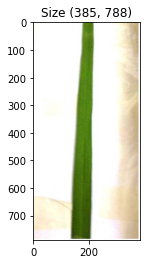

In [7]:
# Modify here jiu ok liaooooooooooooo
directory_root = 'D://Moy Hao Zhen/University of Malaya/Sem 5 - Internship Intel/UMHackathon/archive/Test/Labelled/Healthy'
an_image = open_image(directory_root+"/healthy1.png")

(224, 224, 4)


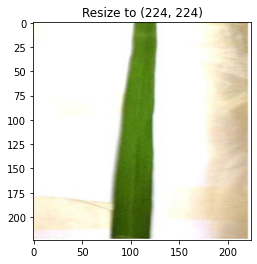

In [8]:
resize_image = resize(an_image)

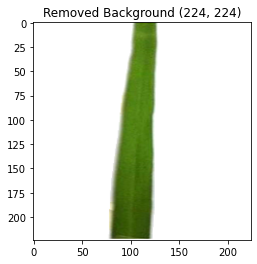

In [9]:
BGRemoved_image = background_remove(resize_image)

In [10]:
final_image = convert_image_to_array(np.array(BGRemoved_image))

In [11]:
indicator = ["BrownSpot", "Healthy", "Hispa", "Leaf Blast"]

In [12]:
np.set_printoptions(suppress=True)
prob = model_trained.predict(final_image)
print("Indicator:", indicator)
print("Probability:", prob[0])
print("Prediction:", indicator[np.argmax(prob[0])], "with confidence", prob[0][np.argmax(prob)])

Indicator: ['BrownSpot', 'Healthy', 'Hispa', 'Leaf Blast']
Probability: [0.10989808 0.4515276  0.11647256 0.32210168]
Prediction: Healthy with confidence 0.4515276
